# Text Vectorization & Retrieval-Augmented Generation (RAG) with OpenAI

This notebook provides a **comprehensive visualization** of text vectorization and demonstrates the power of **vector search** in processing and understanding natural language data. Additionally, it simplifies the main steps of **Retrieval-Augmented Generation (RAG)**.

---

## 📌 Dependencies
To accomplish our goals, we rely on the following key libraries and models:

✅ **Embedding Model: `text-embedding-ada-002`**  
- A high-performance embedding model with a **1536-dimensional** output, designed to capture the **semantic** meaning of text.

✅ **LLM Model: `gpt-3.5-turbo`**  
- A powerful generative model used in the retrieval-augmented generation (RAG) process.

✅ **Vector Similarity & Dimensionality Reduction**  
- `sklearn.metrics.pairwise.cosine_similarity` → Computes similarity between vectorized text data.  
- `sklearn.decomposition.PCA` → Reduces high-dimensional embeddings into **2D and 3D** for visualization.

✅ **Visualization**  
- `matplotlib` → For creating **2D & 3D** plots of text embeddings.  
- `mplcursors` → Enables **interactive exploration** of the plotted data.

---

## 📖 Content Overview

### 🔹 **1. Text Embedding Explanation**
#### 📌 [I. Define Core Functions](#emb_1)  
We define three essential functions for text vectorization and visualization:

- **`plot_2D`** → Generates 2D plots for vectorized text data.  
- **`get_embedding`** → Converts text into numerical vectors using the embedding model.  
- **`compute_cosine_similarity`** → Computes similarity scores between different text vectors.

#### 📌 [II. Define Example Categories](#emb_2)  
We introduce **12 text examples** from four diverse categories:  
1️⃣ **Animals**  
2️⃣ **Sports**  
3️⃣ **Modern Society**  
4️⃣ **Programming**

These examples serve as the foundation for text vectorization and visualization.

#### 📌 [III. Generate Embeddings](#emb_3)  
- We transform text into **high-dimensional vectors** using the `text-embedding-ada-002` model.

#### 📌 [IV. Apply Dimensionality Reduction (PCA)](#emb_4)  
- We apply **Principal Component Analysis (PCA)** to reduce embeddings from **1536 to 3 dimensions**, enabling visualization.

#### 📌 [V. 2D Visualization](#emb_5)  
- We create **2D scatter plots** to explore how embeddings group similar text categories.

#### 📌 [VI. 3D Visualization](#emb_6)  
- Extending the visualization to **3D**, providing a clearer separation between categories.

#### 📌 [VII. Compute Cosine Similarity](#emb_7)  
- We calculate **cosine similarity** scores between selected examples to measure **semantic closeness**.

---

## 🔍 **2. Retrieval-Augmented Generation (RAG) Pipeline**
This section demonstrates a **simple RAG implementation**.

#### 📌 [Step 1: Vectorize the User Query](#rag_1)  
- Convert the **user's input** into an embedding vector.

#### 📌 [Step 2: Perform Vector Search](#rag_2)  
- Compare the **query vector** with existing embeddings in the database.

#### 📌 [Step 3: Retrieve Top `n` Matches](#rag_3)  
- Select the most **relevant documents** based on similarity scores.

#### 📌 [Step 4: Construct LLM Input](#rag_4)  
- Combine the **retrieved context** with the **original query**.

#### 📌 [Step 5: Generate Final Response](#rag_5)  
- Pass the structured input to **GPT-3.5-turbo** and receive a context-aware response.

---

### 🎯 **Conclusion**
This notebook demonstrates how **text embeddings** enable **vector search**, **dimensionality reduction**, and **retrieval-augmented generation (RAG)**. By leveraging OpenAI’s models, we efficiently process **natural language data** and enhance **LLM capabilities** with external knowledge.

---


## **Load the libraries and OpenAI credentials**

In [17]:
# Import libraries
import os
import openai
from dotenv import load_dotenv
import numpy as np
import matplotlib.pyplot as plt
import mplcursors
from sklearn.decomposition import PCA
from langchain_openai import OpenAIEmbeddings
from sklearn.metrics.pairwise import cosine_similarity
from typing import List
%matplotlib ipympl

# Loading openai credentials
load_dotenv()
openai.api_key = os.getenv("OPENAI_API_KEY")

## **Load the embedding model libraries**

In [24]:
model_1 ="text-embedding-ada-002"
model_2 = "text-embedding-3-large"
embedding = OpenAIEmbeddings(
    model=model_1,
)

<a id=emb_1></a>

## **Define functions:** plot_2D, get_embedding, compute_cosine_similarity

In [25]:
def plot_2D(x_values: List[float], 
            y_values: List[float], 
            labels: List[str]) -> None:
    """
    Plots a 2D scatter plot with interactive annotations.

    Parameters:
    x_values (List[float]): A list of x-coordinates for each point.
    y_values (List[float]): A list of y-coordinates for each point.
    labels (List[str]): A list of labels for each point.
    """
    # Create scatter plot
    fig, ax = plt.subplots()
    scatter = ax.scatter(x_values, 
                         y_values, 
                         alpha = 0.5, 
                         edgecolors='k',
                         s = 40) 

    # Create a mplcursors object to manage the data point interaction
    cursor = mplcursors.cursor(scatter, hover=True)

    #aes
    ax.set_title('Embedding visualization in 2D')  # Add a title
    ax.set_xlabel('X_1')  # Add x-axis label
    ax.set_ylabel('X_2')  # Add y-axis label

    # Define how each annotation should look
    @cursor.connect("add")
    def on_add(sel):
        sel.annotation.set_text(labels[sel.target.index])
        sel.annotation.get_bbox_patch().set(facecolor='white', alpha=0.5) # Set annotation's background color
        sel.annotation.set_fontsize(12) 

    plt.show()

def get_embedding(text: str) -> List:
    """
    Retrieves the embedding for a given text.

    Parameters:
    text (str): The text to get the embedding for.

    Returns:
    List: The embedding of the given text.
    """
    return embedding.embed_query(text)

def compute_cosine_similarity(embeddings: np.ndarray, idx1: int, idx2: int) -> float:
    """
    Computes the cosine similarity between two embeddings.

    Parameters:
    embeddings (np.ndarray): An array of embeddings.
    idx1 (int): The index of the first embedding.
    idx2 (int): The index of the second embedding.

    Returns:
    float: The cosine similarity between the two embeddings.
    """
    return cosine_similarity([embeddings[idx1]],[embeddings[idx2]])[0][0]

<a id=emb_2></a>
## **Let's define 12 Examples in 4 different categories:** 

1. Animals
2. Sport
3. Moder society
4. programming

In [26]:
# Group one 
animal_sen_1 = "Elephants are known for their exceptional memory and intelligence, often living in complex social structures."
animal_sen_2 = "The blue whale is the largest animal on the planet, with a heart the size of a small car."
animal_sen_3 = "Peregrine falcons are among the fastest birds, reaching over 200 miles per hour during their hunting stoop."


sport_sen_1 = "Soccer, known as football outside of North America, is the world's most popular sport, with a fan base that spans across continents."
sport_sen_2 = "The modern Olympic Games, revived in 1896, are a global event that brings together athletes from over 200 nations."
sport_sen_3 = "Serena Williams has dominated women's tennis with 23 Grand Slam singles titles, making her one of the greatest athletes of all time."


modern_society_sen_1 = "The advent of the internet has transformed modern society, enabling global connectivity and access to information at an unprecedented scale."
modern_society_sen_2 = "Climate change has become one of the most pressing issues of modern society, with a growing consensus on the need for sustainable practices."
modern_society_sen_3 = "Social media has reshaped the way we communicate and consume information, influencing everything from politics to personal relationships."


programming_sen_1 = "C++ programmers harness the power of low-level memory manipulation, crafting efficient and high-performance software for a variety of applications."
programming_sen_2 = "Java developers thrive in building platform-independent solutions, leveraging the language's 'write once, run anywhere' philosophy for versatile and scalable applications."
programming_sen_3 = "Python programmers embrace the language's readability and expressiveness, creating elegant and concise code that facilitates rapid development across diverse domains."

# combine all the examples in one list
all_input_text = [
    animal_sen_1, animal_sen_2, animal_sen_3,
    sport_sen_1, sport_sen_2, sport_sen_3, 
    modern_society_sen_1, modern_society_sen_2, modern_society_sen_3,
    programming_sen_1, programming_sen_2, programming_sen_3
    ]

<a id=emb_3></a>

## **Apply Embedding**

In [27]:
embeddings = []
for input_text in all_input_text:
    emb = get_embedding(input_text)
    embeddings.append(emb)
    
embeddings_array = np.array(embeddings)
print("Shape: " + str(embeddings_array.shape), "\n")
print("Sample array:", embeddings_array[0])

Shape: (12, 1536) 

Sample array: [-0.02045491 -0.00225689  0.00741302 ... -0.01997746  0.00038204
 -0.02907411]


<a id=emb_4></a>

## **Apply PCA**

In [28]:
# Perform PCA for reducing the dimension from 1536 to 3
PCA_model = PCA(n_components=3)
PCA_model.fit(embeddings_array)
new_values = PCA_model.transform(embeddings_array)

print("Shape: " + str(new_values.shape))
print(new_values)

Shape: (12, 3)
[[-0.00487345 -0.1856614  -0.17708917]
 [ 0.16270194 -0.29702271 -0.21083263]
 [ 0.13659223 -0.28898556 -0.01658912]
 [ 0.17298975  0.04366521  0.22153307]
 [ 0.15421727  0.04202972  0.25511186]
 [ 0.22534505  0.00607983  0.22545845]
 [ 0.0395196   0.26304173 -0.15681554]
 [ 0.08552379  0.18527662 -0.10317437]
 [ 0.08697462  0.28770625 -0.20710486]
 [-0.35653805 -0.03418315 -0.00272842]
 [-0.34067137  0.00462778  0.07604627]
 [-0.36178139 -0.02657431  0.09618446]]


<a id=emb_5></a>

## **2D plot**

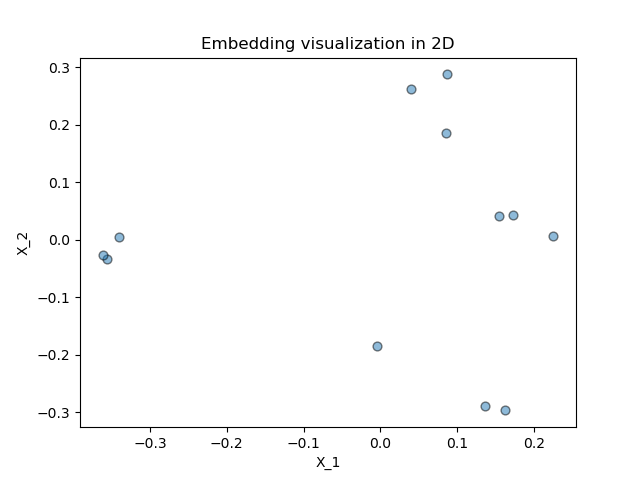

In [29]:
plot_2D(new_values[:,0], new_values[:,1], all_input_text)

<a id=emb_6></a>

## **3D plot**

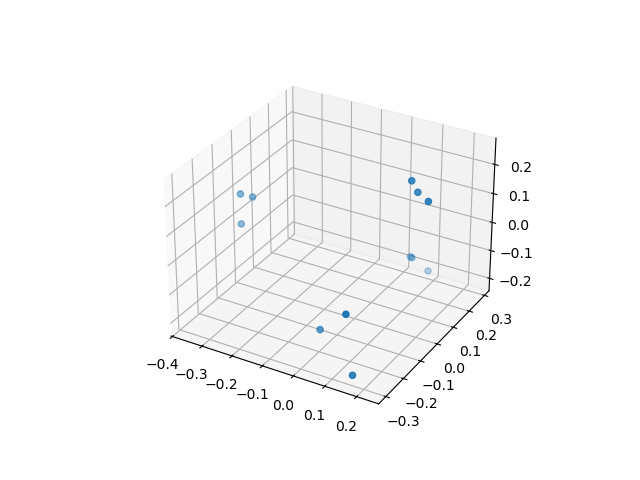

In [30]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(new_values[:, 0], new_values[:, 1], new_values[:, 2])

<a id=emb_7></a>
## **Computing the cosine similarity**


In [31]:
print("animal_sen_1 vs animal_sen_2:", compute_cosine_similarity(embeddings,0,1))
print("animal_sen_1 vs programming_sen_1:", compute_cosine_similarity(embeddings,0,10))

print("sport_sen_1 vs sport_sen_2:", compute_cosine_similarity(embeddings,3,4))
print("sport_sen_1 vs programming_sen_11:", compute_cosine_similarity(embeddings,3,11))

animal_sen_1 vs animal_sen_2: 0.7936298430992277
animal_sen_1 vs programming_sen_1: 0.7539265916009317
sport_sen_1 vs sport_sen_2: 0.8247985576275562
sport_sen_1 vs programming_sen_11: 0.7380493887832322


## Simple RAG

Let's consider `embeddings` list to be our Vector database and search a query over it and return the results 

<a id=rag_1></a>
## **Step 1: Vectorize the user's query** 

In [33]:

query = "What are some remarkable characteristics of elephants?"

q_v = get_embedding(query)

<a id=rag_2></a>
## **Step 2: Perfrom vector search between the user's query and the vector database** 

In [34]:
def search(embeddings:List, q_v:List)->List[float]:
    """
    Search for the cosine similarity scores between a query vector (q_v) and a list of embedding vectors.

    Parameters:
        embeddings (List[List[float]]): A list of embedding vectors.
        q_v (List[float]): The query vector for which the cosine similarity scores are calculated.

    Returns:
        List[float]: A list of cosine similarity scores between the query vector and each embedding vector.
    """
    scores = []
    for vec in embeddings:
        scores.append(cosine_similarity([vec], [q_v])[0][0])
    return scores

score_list = search(embeddings, q_v)
score_list

[0.8979636450708521,
 0.7961396732668041,
 0.747928296265649,
 0.7158517698386553,
 0.7308154772626797,
 0.7253848239746693,
 0.73314958805789,
 0.72308562291284,
 0.717541929590173,
 0.7215906396062837,
 0.7287541603050351,
 0.7337037635451193]

<a id=rag_3></a>
## **Step 3: Retrieve the top `n` results.**

In [35]:
n = 3
sorted_indices = np.argsort(score_list)[::-1]
top_n_indices = sorted_indices[:n]
top_n_indices

retrieved_content = []
for i in top_n_indices:
    print(all_input_text[i], "\n")
    retrieved_content.append(all_input_text[i])

Elephants are known for their exceptional memory and intelligence, often living in complex social structures. 

The blue whale is the largest animal on the planet, with a heart the size of a small car. 

Peregrine falcons are among the fastest birds, reaching over 200 miles per hour during their hunting stoop. 



<a id=rag_4></a>

## **Step 4: Prepare the LLM's input using the retrieved content and the user's query**

We want to Pass the retrieved content along with the user's query to a LLM to get the proper response. The role of the LLM is to see whether the retrieved content contain the answer to the user's question and provide a clean and organized response.

In [36]:
llm_system_role = "As a helpful chatbot, your role is to assist users by analyzing their questions alongside retrieved content.\
        Dispense answers exclusively from the provided content and refrain from incorporating personal knowledge if the answer is\
        absent in the retrieved information."
prompt = f"# Retrieved content: {retrieved_content}\n\n# User's query: {query}"
print(prompt)

# Retrieved content: ['Elephants are known for their exceptional memory and intelligence, often living in complex social structures.', 'The blue whale is the largest animal on the planet, with a heart the size of a small car.', 'Peregrine falcons are among the fastest birds, reaching over 200 miles per hour during their hunting stoop.']

# User's query: What are some remarkable characteristics of elephants?


In [37]:
import openai
gpt_model = "gpt-4o"
temperature= 0
client = openai.OpenAI() 

response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
                {"role": "system", "content": llm_system_role},
                {"role": "user", "content": prompt}
            ],
     temperature=temperature,
)



print(response.choices[0].message.content)  # Get the response text


Elephants are known for their exceptional memory and intelligence, often living in complex social structures.
